In [1]:
import numpy as np                         
import pandas as pd                       
import matplotlib.pyplot as plt                        
import seaborn as sns                                      


In [3]:
# import data
ky = pd.read_csv('kyphosis.csv')
ky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
ky['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [9]:
ky['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [7]:
ky.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


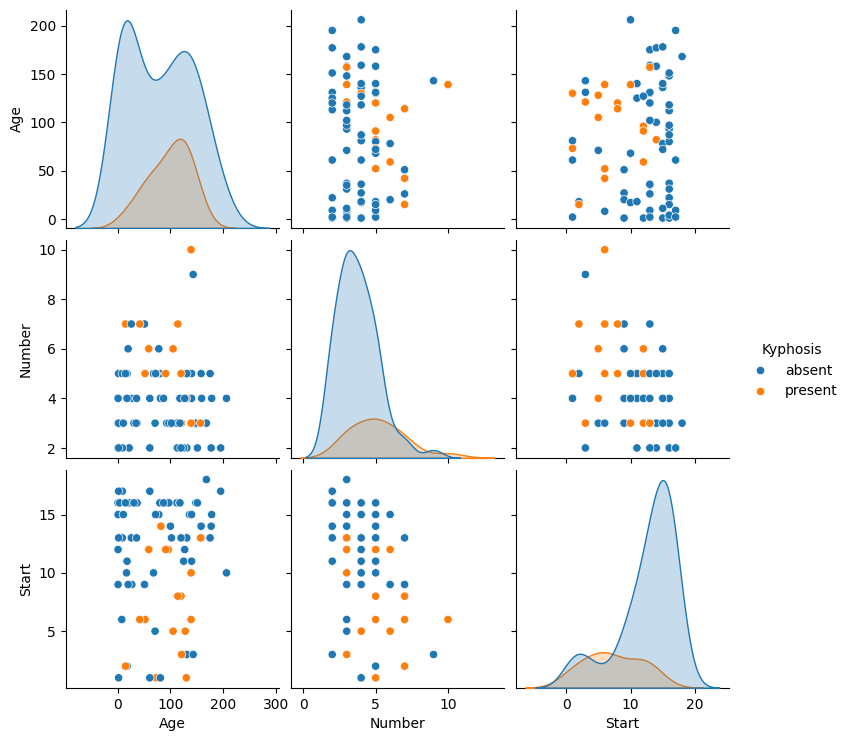

In [5]:
sns.pairplot(data=ky, hue='Kyphosis')

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,LabelEncoder

X = ky.drop('Kyphosis', axis=1)
y = ky['Kyphosis']

In [26]:
# enchode y variable
enchoder = LabelEncoder()
y = enchoder.fit_transform(y)

In [28]:
# train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

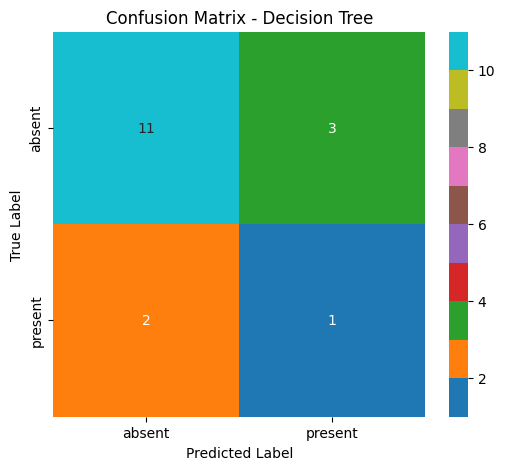

In [42]:
# deciion tree classifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

dclassifier = DecisionTreeClassifier()
dregressor = DecisionTreeRegressor()


#fit classifier model
dclassifier.fit(X_train,y_train)
dpredictor = dclassifier.predict(X_test)

# confusion matrix of prediction
conf_matrix = confusion_matrix(y_test,dpredictor)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True,cmap="tab10", xticklabels=enchoder.classes_, yticklabels=enchoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

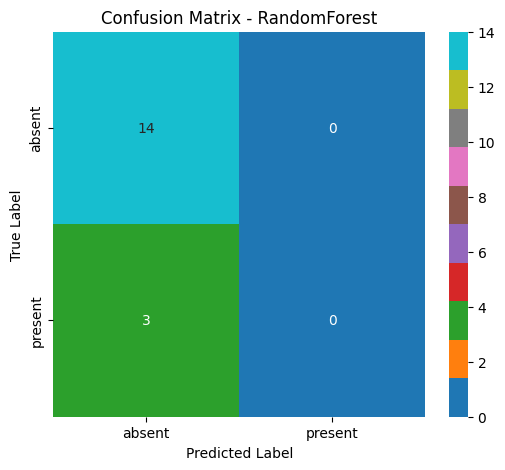

In [43]:
# random forest classifier model 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfclassifier = RandomForestClassifier(n_estimators=200)
rfregressor = RandomForestRegressor(n_estimators=100)

#fit classifier model
rfclassifier.fit(X_train,y_train)
rfcpredictor = rfclassifier.predict(X_test)

# confusion matrix of prediction
conf_matrix = confusion_matrix(y_test,rfcpredictor)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True,cmap="tab10", xticklabels=enchoder.classes_, yticklabels=enchoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RandomForest")
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight':[None, 'balanced'],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)


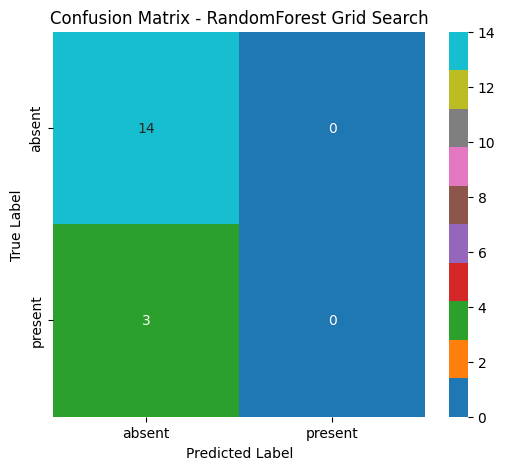

In [48]:
# confusion matrix of prediction
conf_matrix = confusion_matrix(y_test,predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True,cmap="tab10", xticklabels=enchoder.classes_, yticklabels=enchoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RandomForest Grid Search")
plt.show()

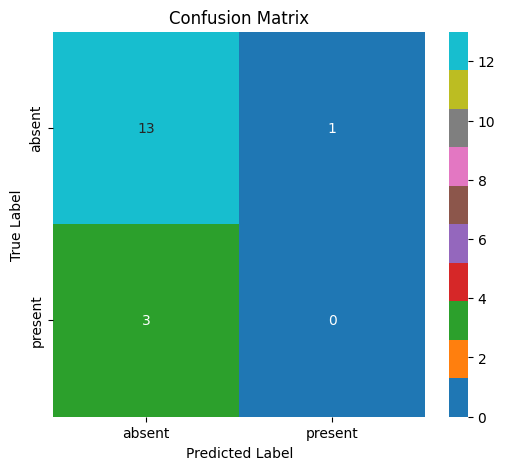

In [ ]:
# import sklearn models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# linear discriminant analysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train,y_train)

# predict resutls
ldapredictor = lda.predict(X_test)

# confusion matrix of prediction
lda_matrix = confusion_matrix(y_test,ldapredictor)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(lda_matrix, annot=True,cmap="tab10", xticklabels=enchoder.classes_, yticklabels=enchoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ")
plt.show()

In [50]:
import lightgbm as lgb

# Create dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# Train model
# model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data], early_stopping_rounds=10)
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Predict
y_pred = model.predict(X_test)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.445386


In [ ]:
# naive bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
"""
Gaussian Naive: gaussian distribution
Multinomial Naive: for multnomial distribution for discrete data such as frequency counts
Bernoulli Naive: Used with Boolean variables, True and False
"""
# naive models
naive_model = GaussianNB()

# fit model
naive_model.fit(X_train, y_train)

# make predictions
ypredictions = naive_model.predict(X_test)

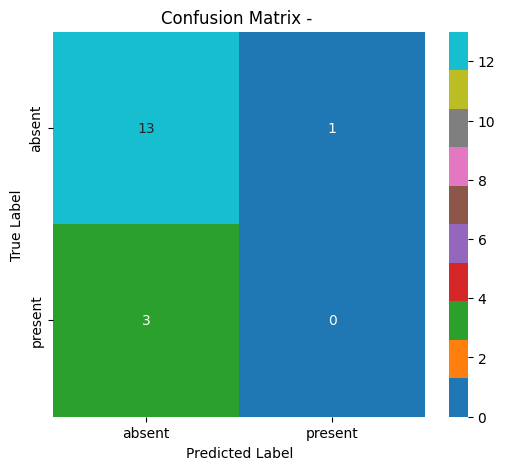

In [ ]:
# confusion matrix of prediction
naive_matrix = confusion_matrix(y_test,ypredictions)
 
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(naive_matrix, annot=True,cmap="tab10", xticklabels=enchoder.classes_, yticklabels=enchoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Nive Bayes")
plt.show()